In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import os 

In [1]:
def short_term_energy(frame):
    return np.sum(frame**2)
def mean_average(frame):
    return np.sum(abs(frame))
def zero_crossing_rate(frame):
    return np.sum(np.abs(np.sign(frame[:-1]) - np.sign(frame[1:])))

In [10]:
def get_label(dir_path: str):
    label_names = [item for item in os.listdir(dir_path) if item.endswith(".lab")]
    res = {}
    for label_name in label_names:
        path = os.path.join(dir_path, label_name)
        with open(path, "r") as f:
            lines = f.read().splitlines()
            name = label_name[:label_name.rfind(".")]
            res[name] = {
                "mean": float(lines[-2].split()[-1]),
                "std": float(lines[-1].split()[-1]),
            }
            for line in lines[:-2]:
                line = line.split()
                start = float(line[0])
                end = float(line[1])
                label = line[2]
                if label not in res[name]:
                    res[name][label] = []
                res[name][label].append((start, end))
    return res

In [50]:
SAMPLE_DIR = r"/home/viethung/DSP/VowelRegconition/TinHieuKiemThu"
OTHER_SAMPLE_DIR = r"/home/viethung/DSP/VowelRegconition/TinHieuHuanLuyen"

In [51]:
labels = get_label(SAMPLE_DIR)
other_labels = get_label(OTHER_SAMPLE_DIR)

In [73]:
def get_value(labels,dir_path,attribute_functions):
    voice_values = {}
    for value in labels:
        voice_values[value] = []
        voice_frames = labels[value]['v']
        path = os.path.join(dir_path, value)
        sample_rate, signal = wavfile.read(f'{path}.wav')
        frame_size = int(sample_rate * 0.03)
        for frame in voice_frames:
            start = int(frame[0] * sample_rate)
            end = int(frame[1] * sample_rate)
            temp_signal = signal[start:end]
            voice_features = voice_segment(temp_signal, frame_size, attribute_functions)
            voice_features /= np.max(voice_features)
            voice_values[value].append(voice_features)
    return voice_values

In [76]:
voice_value = get_value(dir_path=SAMPLE_DIR,labels=labels, attribute_functions="short_term_energy")

/tmp/ipykernel_13133/3482111237.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read(f'{path}.wav')


In [77]:
other_voice_value = get_value(dir_path=OTHER_SAMPLE_DIR,labels=other_labels, attribute_functions="short_term_energy")

/tmp/ipykernel_13133/3482111237.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read(f'{path}.wav')


In [90]:
import itertools
y_voice = []
for value in voice_value:
    #flatten array
    values = list(itertools.chain(*voice_value[value]))
    for amplitude in values:
        y_voice.append(amplitude)
for value in other_voice_value:
    #flatten array
    values = list(itertools.chain(*other_voice_value[value]))
    for amplitude in values:
        y_voice.append(amplitude)
x_voice = np.arange(len(y_voice))

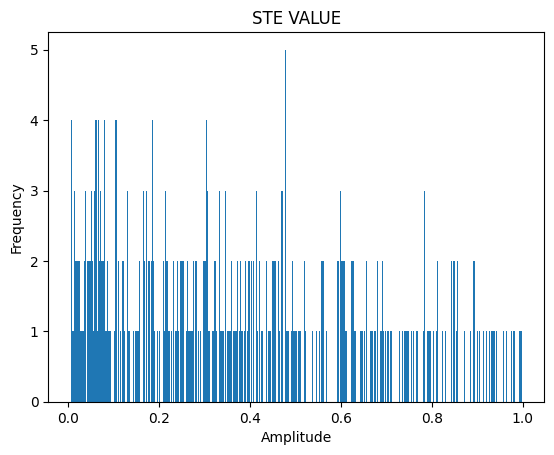

In [98]:
plt.hist(y_voice, bins=np.arange(min(y_voice), max(y_voice), step = 1 / len(y_voice)))
plt.ylabel("Frequency")
plt.xlabel("Amplitude")
plt.title("STE VALUE")
plt.show()

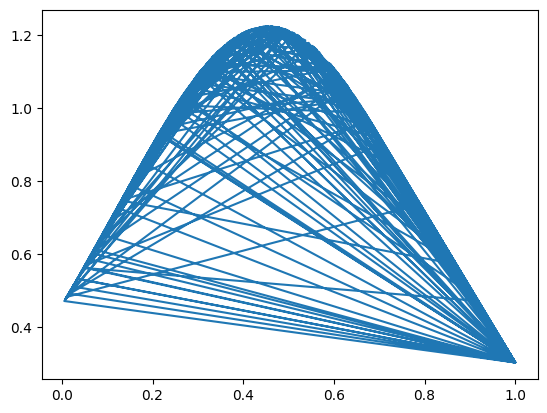

In [99]:
from scipy.stats import norm
import statistics

mean = statistics.mean(y_voice)
std = statistics.stdev(y_voice)

plt.plot(y_voice, norm.pdf(y_voice, mean, std))
plt.show()